In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [0]:
img = cv2.imread('19_7777.jpg')
height, width, channel = img.shape

In [81]:
img.shape

(626, 940, 3)

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

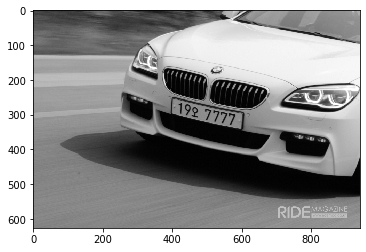

In [5]:
plt.imshow(gray,cmap='gray')

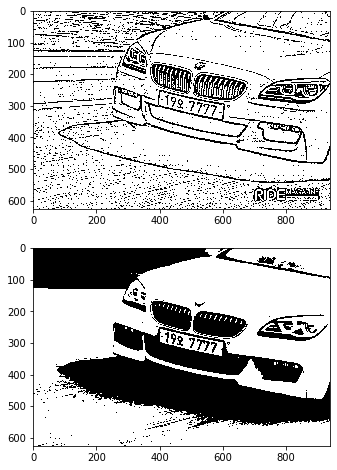

In [83]:
img_athres = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15,3)
ret, img_thres = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.imshow(img_athres, cmap='gray')
plt.subplot(2,1,2)
plt.imshow(img_thres, cmap='gray')

In [0]:
img_blur = cv2.GaussianBlur(gray, ksize=(5,5),sigmaX=0)

In [0]:
img_blur_thres = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,19,9)

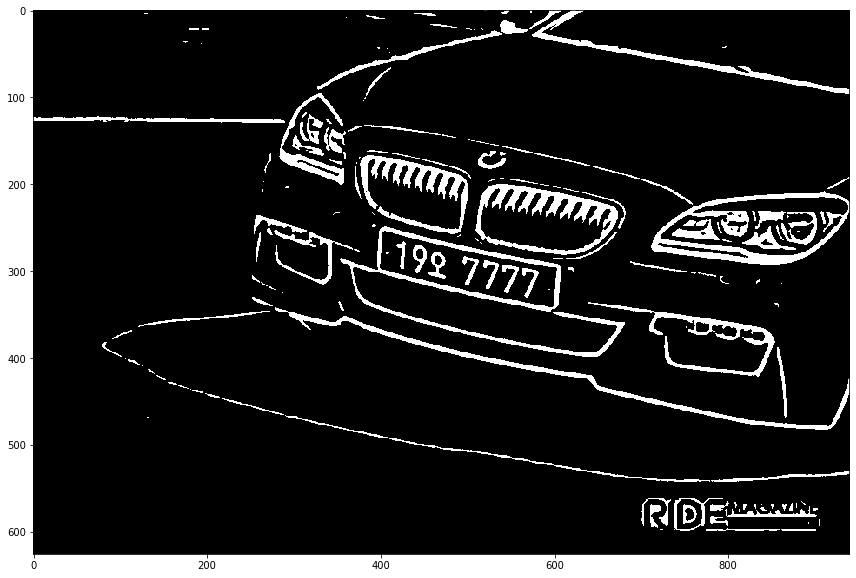

In [86]:
plt.figure(figsize=(20,10))
plt.imshow(img_blur_thres,cmap='gray')

In [11]:
contours = cv2.findContours(img_blur_thres, mode=cv2.RETR_LIST,method=cv2.CHAIN_APPROX_SIMPLE)[0]
len(contours)

180

In [0]:
temp_result = np.zeros((height, width, channel),dtype=np.uint8)

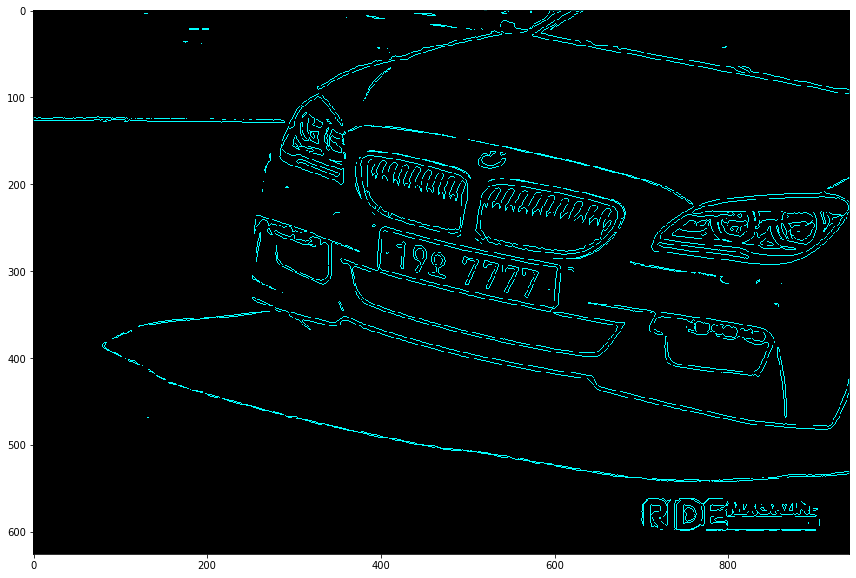

In [15]:
cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(0,255,255))
plt.figure(figsize=(20,10))
plt.imshow(temp_result)


cv2.boundingRect(contour) :  contour에 대한 좌표, 너비, 높이 준다.
cv2.rectangle(img, (x,y),(x+w,y+h),color,thickness) : 맨끝점, 맨 윗점 알려주면 네모칸을 그려준다


In [0]:
contours_dict=[]
temp = np.zeros((height,width, channel),dtype=np.uint8)
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(temp, pt1 = (x,y),pt2=(x+w, y+h), color=(255,0,0), thickness=2)
  contours_dict.append({
      'x': x,
      'y': y,
      'w': w,
      'h': h,
      'cx': x + (w/2),
      'cy': y + (h/2)
  })

In [17]:
contours_dict[0:5]

[{'cx': 881.0, 'cy': 598.5, 'h': 3, 'w': 40, 'x': 861, 'y': 597},
 {'cx': 723.0, 'cy': 597.5, 'h': 1, 'w': 4, 'x': 721, 'y': 597},
 {'cx': 892.5, 'cy': 590.0, 'h': 2, 'w': 1, 'x': 892, 'y': 589},
 {'cx': 905.5, 'cy': 590.0, 'h': 8, 'w': 3, 'x': 904, 'y': 586},
 {'cx': 816.5, 'cy': 591.0, 'h': 18, 'w': 85, 'x': 774, 'y': 582}]

In [0]:
area_list=[]
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  a = w*h
  area_list.append(a)

In [0]:
area_list

None


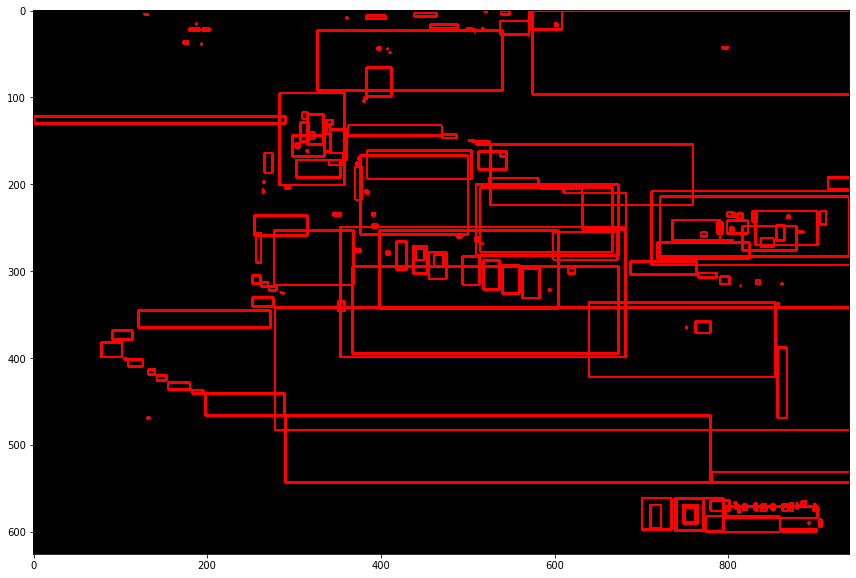

In [18]:
plt.figure(figsize=(20,10))
plt.imshow(temp, cmap='gray')

In [0]:
MAX_AREA = 700
MIN_AREA = 150
MIN_WIDTH, MIN_HEIGHT = 2, 8
MIN_RATIO, MAX_RATIO = 0.25, 1.0

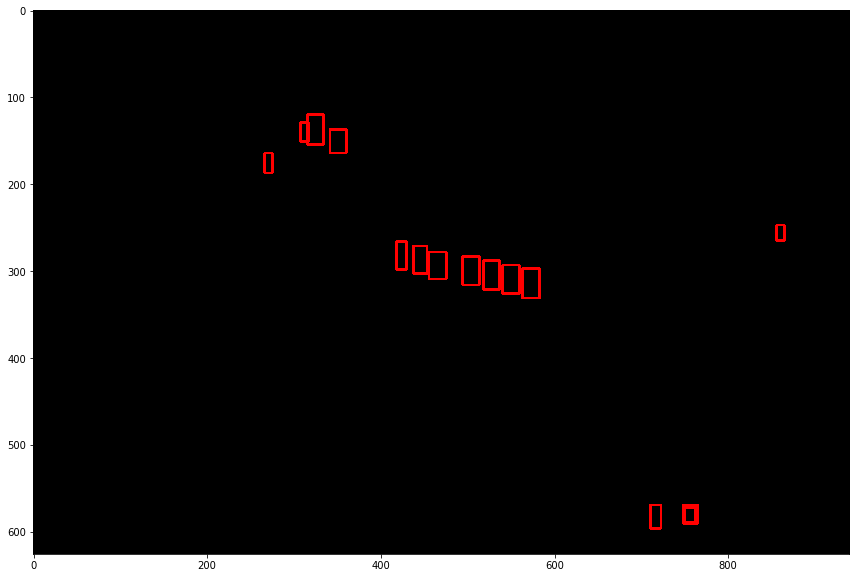

In [31]:
possible_contours = []
cnt = 0
for d in contours_dict:
  area = d['w'] * d['h']
  ratio = d['w'] / d['h']

  if MAX_AREA > area > MIN_AREA \
  and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT \
  and MIN_RATIO < ratio < MAX_RATIO:
    d['idx'] = cnt
    cnt += 1
    possible_contours.append(d)

temp_result = np.zeros((height,width,channel), dtype=np.uint8)
for d in possible_contours:
  cv2.rectangle(temp_result, pt1=(d['x'],d['y']), pt2 = (d['x']+d['w'], d['y']+d['h']),color=(255,0,0),\
                thickness=2)

plt.figure(figsize=(20,10))
plt.imshow(temp_result, cmap='gray')


In [0]:
possible_contours
sort_possible = sorted(possible_contours, key=lambda x : x['cx'])

In [44]:
find_num=sort_possible[4:11]
find_num

[{'cx': 423.5, 'cy': 282.0, 'h': 32, 'idx': 9, 'w': 11, 'x': 418, 'y': 266},
 {'cx': 445.0, 'cy': 287.0, 'h': 32, 'idx': 8, 'w': 16, 'x': 437, 'y': 271},
 {'cx': 465.0, 'cy': 293.5, 'h': 31, 'idx': 7, 'w': 20, 'x': 455, 'y': 278},
 {'cx': 503.5, 'cy': 299.5, 'h': 33, 'idx': 6, 'w': 19, 'x': 494, 'y': 283},
 {'cx': 527.0, 'cy': 304.5, 'h': 33, 'idx': 5, 'w': 18, 'x': 518, 'y': 288},
 {'cx': 549.5, 'cy': 309.5, 'h': 33, 'idx': 4, 'w': 19, 'x': 540, 'y': 293},
 {'cx': 572.5, 'cy': 314.0, 'h': 34, 'idx': 3, 'w': 19, 'x': 563, 'y': 297}]

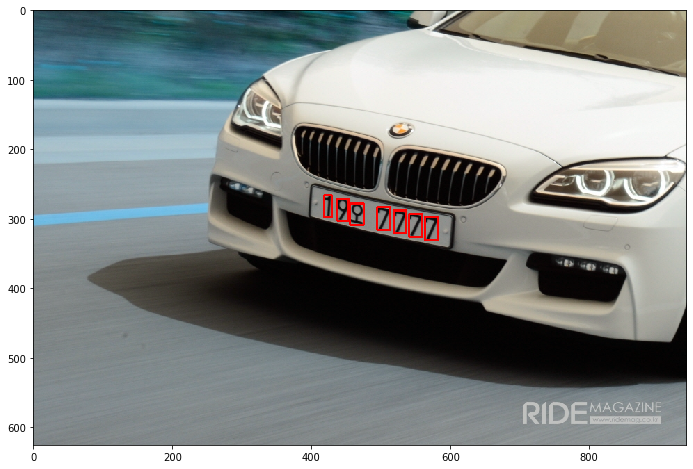

In [53]:
temp = np.zeros((height, width, channel),dtype=np.uint8)
for dic in find_num:
  cv2.rectangle(img, (dic['x'],dic['y']), (dic['x']+dic['w'], dic['y']+dic['h']),(255,0,0),thickness=2)
plt.figure(figsize=(16,8))
plt.imshow(img)

In [46]:
dx = find_num[-1]['cx'] - find_num[0]['cx']
dy = find_num[-1]['cy'] - find_num[0]['cy']
get_degree = np.degrees(np.arctan(dy / dx))
get_degree

12.121015452585759

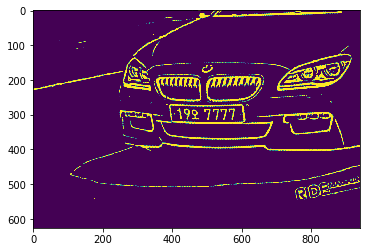

In [58]:
plate_cx = (find_num[0]['cx'] + find_num[-1]['cx']) / 2
plate_cy = (find_num[0]['cy'] + find_num[-1]['cy']) / 2
rotation_matrix = cv2.getRotationMatrix2D(center=(plate_cx, plate_cy), angle=get_degree, scale=1.0)
img_rotated = cv2.warpAffine(img_blur_thres, M=rotation_matrix,dsize= (width,height))
plt.imshow(img_rotated)

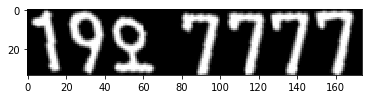

In [64]:
plate_width = find_num[-1]['x'] + find_num[-1]['w'] - find_num[0]['x'] + 10
plate_height = 34
img_crop = cv2.getRectSubPix(img_rotated, (plate_width, plate_height), (plate_cx, plate_cy))
plt.imshow(img_crop, cmap='gray')

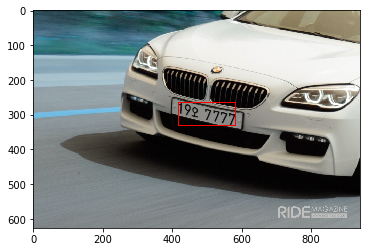

In [75]:
cv2.rectangle(img, (find_num[0]['x'], find_num[0]['y']),(find_num[-1]['x']+find_num[-1]['w'],\
                    find_num[-1]['y']+find_num[-1]['h']),(255,0,0), thickness=2 )
plt.imshow(img)

In [0]:
MAX_DIAG_MULTIPLYER = 5 # 5
MAX_ANGLE_DIFF = 12.3 # 12.0
MAX_AREA_DIFF = 0.5 # 0.5
MAX_WIDTH_DIFF = 1
MAX_HEIGHT_DIFF = 0.2
MIN_N_MATCHED = 3 # 3

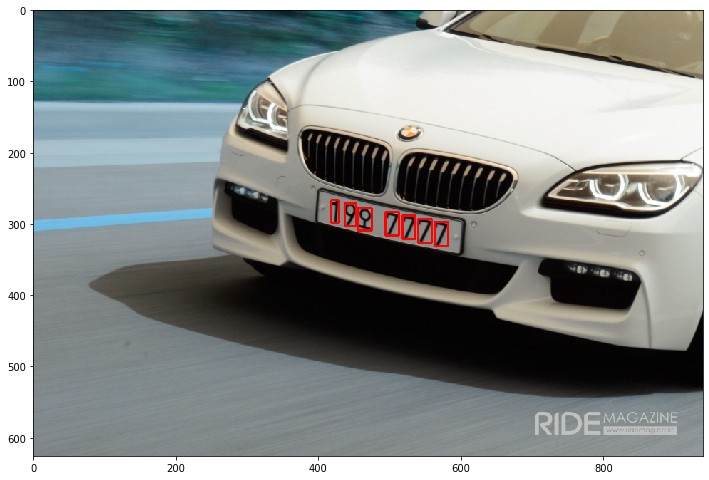

In [89]:
def find_chars(contour_list):
    matched_result_idx = []
    
    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2)

            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))
            if dx == 0:
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy / dx))
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            width_diff = abs(d1['w'] - d2['w']) / d1['w']
            height_diff = abs(d1['h'] - d2['h']) / d1['h']

            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
                matched_contours_idx.append(d2['idx'])

        # append this contour
        matched_contours_idx.append(d1['idx'])

        if len(matched_contours_idx) < MIN_N_MATCHED:
            continue

        matched_result_idx.append(matched_contours_idx)

        

        

    return matched_result_idx
    
result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))

# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
#         cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
        cv2.rectangle(img, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 0, 0), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(img, cmap='gray')

In [93]:
max(result_idx[:])

[4, 5, 6, 7, 8, 9, 3]

In [77]:
np.take(possible_contours, 1)

{'cx': 756.0, 'cy': 580.0, 'h': 22, 'idx': 1, 'w': 16, 'x': 748, 'y': 569}

In [0]:
sorted_match = sorted(matched_result[0], key=lambda x: x['cx'])

In [195]:
matched_result[0]

array([{'x': 540, 'y': 293, 'w': 19, 'h': 33, 'cx': 549.5, 'cy': 309.5, 'idx': 6},
       {'x': 518, 'y': 288, 'w': 18, 'h': 33, 'cx': 527.0, 'cy': 304.5, 'idx': 7},
       {'x': 494, 'y': 283, 'w': 19, 'h': 33, 'cx': 503.5, 'cy': 299.5, 'idx': 8},
       {'x': 455, 'y': 278, 'w': 20, 'h': 31, 'cx': 465.0, 'cy': 293.5, 'idx': 9},
       {'x': 437, 'y': 271, 'w': 16, 'h': 32, 'cx': 445.0, 'cy': 287.0, 'idx': 10},
       {'x': 563, 'y': 297, 'w': 19, 'h': 34, 'cx': 572.5, 'cy': 314.0, 'idx': 5}],
      dtype=object)

In [196]:
sorted_match

[{'cx': 445.0, 'cy': 287.0, 'h': 32, 'idx': 10, 'w': 16, 'x': 437, 'y': 271},
 {'cx': 465.0, 'cy': 293.5, 'h': 31, 'idx': 9, 'w': 20, 'x': 455, 'y': 278},
 {'cx': 503.5, 'cy': 299.5, 'h': 33, 'idx': 8, 'w': 19, 'x': 494, 'y': 283},
 {'cx': 527.0, 'cy': 304.5, 'h': 33, 'idx': 7, 'w': 18, 'x': 518, 'y': 288},
 {'cx': 549.5, 'cy': 309.5, 'h': 33, 'idx': 6, 'w': 19, 'x': 540, 'y': 293},
 {'cx': 572.5, 'cy': 314.0, 'h': 34, 'idx': 5, 'w': 19, 'x': 563, 'y': 297}]

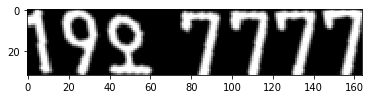

In [67]:
PLATE_WIDTH_PADDING = 1 # 1.3
PLATE_HEIGHT_PADDING = 1 # 1.5
MIN_PLATE_RATIO = 3
MAX_PLATE_RATIO = 10

plate_imgs = []
plate_infos = []

for i, matched_chars in enumerate(matched_result):
    sorted_chars = sorted(matched_chars, key=lambda x: x['cx'])

    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) / 2
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) / 2
    
    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING
    
    sum_height = 0
    for d in sorted_chars:
        sum_height += d['h']

    plate_height = int(sum_height / len(sorted_chars) * PLATE_HEIGHT_PADDING)
    
    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    triangle_hypotenus = np.linalg.norm(
        np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) - 
        np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
    )
    
    angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenus))
    
    rotation_matrix = cv2.getRotationMatrix2D(center=(plate_cx, plate_cy), angle=angle, scale=1.0)
    
    img_rotated = cv2.warpAffine(img_blur_thres, M=rotation_matrix, dsize=(width, height))
    
    img_cropped = cv2.getRectSubPix(
        img_rotated, 
        patchSize=(int(plate_width), int(plate_height)), 
        center=(int(plate_cx), int(plate_cy))
    )
    if img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO or img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO > MAX_PLATE_RATIO:
        continue
    
    plate_imgs.append(img_cropped)
    plate_infos.append({
        'x': int(plate_cx - plate_width / 2),
        'y': int(plate_cy - plate_height / 2),
        'w': int(plate_width),
        'h': int(plate_height)
    })
    
    plt.subplot(len(matched_result), 1, i+1)
    plt.imshow(img_cropped, cmap='gray')

In [0]:
ret, number_plate = cv2.threshold(img_crop, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

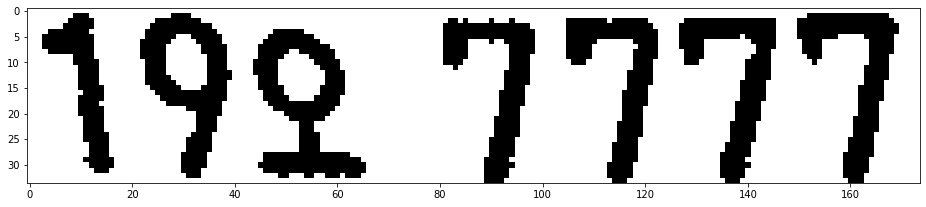

In [69]:
plt.figure(figsize=(16,8))
plt.imshow(number_plate, cmap='gray')

In [0]:
number_plate = cv2.adaptiveThreshold(img_crop,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,9,2)

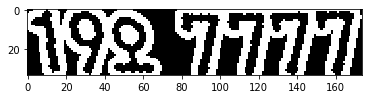

In [71]:
plt.imshow(number_plate, cmap='gray')

In [0]:
a = [1,2,3,4,5]
b = [2,3,4,5,7]
c =[]

for i in range(len(a)):
  x, y = a[i], b[i]
  c.append([x,y])

In [203]:
c

[[1, 2], [2, 3], [3, 4], [4, 5], [5, 7]]